In [20]:
import sys
sys.path.insert(0, '/home/reza/erq')
from scipy import interpolate
import pyfits
from numpy import *
import math
import scipy.ndimage
from scipy import interpolate
from numpy import nanmean
from numpy import nanmedian
from readSDSSspectrafast import *
import matplotlib.pylab as plt
import numpy as np
from erqml import *
from scipy import ndimage
from line_db import line_db
import os

In [21]:
def line_db(ymax, fs, fs1, ii):
    from numpy import array
    import matplotlib.pyplot as plt
    # some line wavelengths
    s6 = array([933.862,944.523])
    c3 = array([977.020,1175.71,1908.73])
    n3 = array([989.799, 1750.0])
    lyb = 1025.722
    o6 = array([1031.926,1037.617])
    s4 = array([1062.664,1073.518])
    n2 = array([1083.993,1084.580,1085.701,2142.0])
    p5 = array([1117.977,1128.008])
    si3 = array([1206.500,1892.03])
    lya = 1215.670
    he2 = 1640.4
    n4 = 1486.5
    #o4 = array([1397.21,1399.78,1404.79,1407.39])
    o4 = array([1401.157,1407.382])
    n5 = array([1238.821,1242.804])
    si2a = array([1190.416,1193.290,1194.500])
    si2b = array([1260.422,1264.738,1526.7066,1533.4310])
    #o1 = array([1302.1685,1305.0])
    o1 = array([1302.1685,1305.0])
    o1c = 1303.5
    #c2 = array([1334.532,1335.708])
    c2 = array([1334.532,1335.708,2326.0])
    c2c = 1335.0
    si4 = array([1393.755,1402.770])
    c4 = array([1548.195,1550.770])
    fe2 = array([1608.4511, 1786.7])
    fe3 = array([1122.52,1124.87,1128.72,1131.908,1895.46,1914.06,1926.30])
    o3 = 1664.
    al2 = array([1670.7874])
    al3 = array([1854.716,1862.7895])
    mg2 = array([2796.352,2803.531])
    
    # Set the size and aspect ratio of the output pdf plot (in inches) by inserting this command before all other plot commands:
    # This sets the axis ranges:
    plt.ylim(0.0,ymax)
#     plt.xlim(1145,1975)
#     plt.xlim(1145,1675)
    # This uses the wavelength data to draw all the light blue vertical lines in my plot to mark where different lines should be:
    plt.axvline(lya,c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(lyb,c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(he2,c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(o6[0],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(o6[1],c='c',lw=0.6,ls='--', alpha=0.5)
    #plt.axvline(si3[1],c='gold',lw=0.6,ls='--', alpha=1.0)
    plt.axvline(n5[0],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(n5[1],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(n3[1],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(c3[2],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(si2b[0],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(si2b[1],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(si2b[2],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(si2b[3],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(si4[0],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(si4[1],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(o4[0],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(o4[1],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(s4[0],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(s4[1],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(c4[0],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(c4[1],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(c2c,c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(fe2[1],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(fe3[0],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(fe3[1],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(fe3[2],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(fe3[3],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(fe3[4],c='c',lw=0.6,ls='--',alpha=0.5)
    plt.axvline(fe3[5],c='c',lw=0.6,ls='--',alpha=0.5)
    plt.axvline(fe3[6],c='c',lw=0.6,ls='--',alpha=0.5)
    plt.axvline(si3[1],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(o1c,c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(n4,c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(o3,c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(al3[0],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(al3[1],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(mg2[1],c='c',lw=0.6,ls='--', alpha=0.5)
    plt.axvline(mg2[0],c='c',lw=0.6,ls='--', alpha=0.5)
    # This inserts labels for most of the lines near the top of the plot window (where ymax = the top):
    plt.text(1197,  0.94*ymax,'Ly$\\alpha$',ha='center',va='center',fontsize=fs)
    plt.text(1240,  0.97*ymax,'NV',ha='center',va='center',fontsize=fs)
    plt.text(1264,  0.92*ymax,'SiII',ha='center',va='center',fontsize=fs)
    plt.text(1303,  0.95*ymax,'OI',ha='center',va='center',fontsize=fs)
    plt.text(1335,  0.95*ymax,'CII',ha='center',va='center',fontsize=fs)
    plt.text(1399,  0.95*ymax,'SiIV',ha='center',va='center',fontsize=fs1)
    plt.text(1403,  0.9*ymax,'OIV]',ha='center',va='center',fontsize=fs1)
    plt.text(1486,  0.95*ymax,'NIV]',ha='center',va='center',fontsize=fs)
    plt.text(1527,  0.9*ymax,'SiII',ha='center',va='center',fontsize=fs)
    plt.text(1549,  0.95*ymax,'CIV',ha='center',va='center',fontsize=fs)
    if(ii!=3):
        plt.text(1743,  0.93*ymax,'NIII]',ha='center',va='center',fontsize=fs)
        plt.text(1790,  0.93*ymax,'FeII',ha='center',va='center',fontsize=fs)
        plt.text(1625,  0.95*ymax,'HeII',ha='center',va='center',fontsize=fs)
        plt.text(1672,  0.95*ymax,'OIII]',ha='center',va='center',fontsize=fs)
        plt.text(1859,  0.95*ymax,'AlIII',ha='center',va='center',fontsize=fs)
        plt.text(1888,  0.9*ymax,'SiIII]',ha='center',va='center',fontsize=fs)
        plt.text(1909,  0.95*ymax,'CIII]',ha='center',va='center',fontsize=fs)
        plt.text(1926,  0.9*ymax,'FeIII',ha='center',va='center',fontsize=fs)

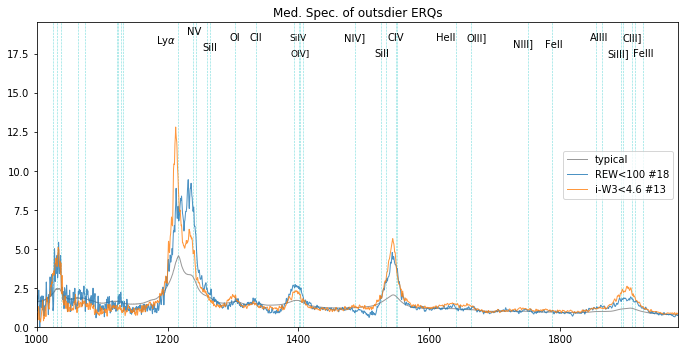

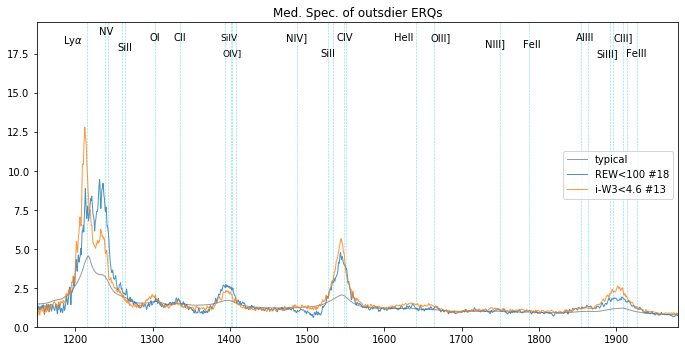

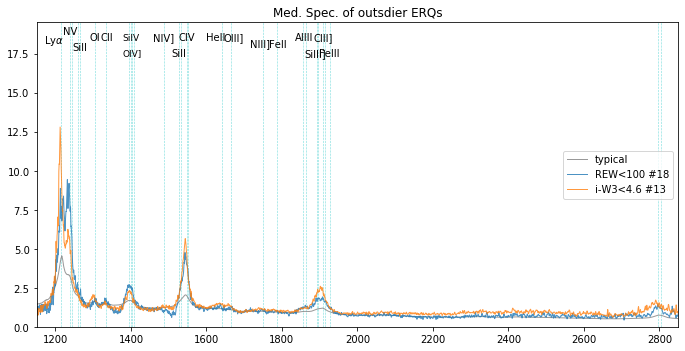

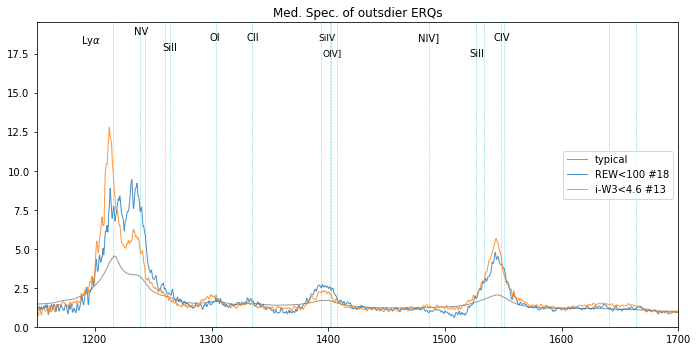

In [22]:
## Define a log wavelength grid for the composite spectrum
step = 1.00015
bb = arange(0,8813,1)
wgrid = 800.0 * step**bb

# Insert code here to read data for all possible quasars (redshift, colors, line data, etc.)

from astropy.table import Table, Column
# SMALL_SIZE = 20
# MEDIUM_SIZE = 20
# BIGGER_SIZE = 20

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
# # 



# selection parameters
tab=Table.read('/home/reza/erq/sampling/sample_Lum_flat.fits')
# This 2D array will hold all the spectra used for the median below
# selection parameters
z_dr12=tab['z_dr12']
plate = tab['Plate']
mjd = tab['MJD']
fiberid= tab['FiberID']


# nqsos is the total number of quasars in the catalog.
# zdr12 is the redshift from the DR12 catalog. You might use something else.
# zp1 is z+1

# This loop goes through the quasar selection only to determine the total number that will go into the median
# nqsos = len(z_dr12)
nqsos = len(z_dr12)

# This 2D array will hold all the spectra used for the median below
# while(wedge<360):


dir=1; enclosing_ratio=0.90
enclosinf_ratio=0.90; dir=1
bin_label=np.loadtxt('/home/reza/erq/nSphere/enc-r-%.2f-dir-%d/bin_label.txt' %(enclosinf_ratio, dir))
# tip_label=np.loadtxt('enc-r-%.2f-dir-%d/tip_label.txt' %(enclosinf_ratio, dir) )
bin_pop=np.loadtxt('/home/reza/erq/nSphere/enc-r-%.2f-dir-%d/bin_pop.txt' %(enclosinf_ratio, dir))
# tip_pop = int(sum(tip_label))
c=['C0', 'C1', 'C2','C3', 'C4', 'C5', 'C6', 'C7',  'black']
j=0
if(j==0): ymax=19.5; ymin=0.01*ymax; fs=10; fs1=9; x_median=1280; y_median = 0.83*ymax; med_step=0.7
# if(j==1 and enclosing_ratio==0.85): ymax=18.0; ymin=0.01*ymax; fs=10; fs1=9; x_median=1280; y_median = 0.83*ymax; med_step=0.7
# if(j==1 and enclosing_ratio==0.9): ymax=19; ymin=0.01*ymax; fs=10; fs1=9; x_median=1280; y_median = 0.83*ymax; med_step=0.7
# if(j==2): ymax=14; ymin=0.01*ymax; fs=10; fs1=9; x_median=1280; y_median = 0.83*ymax; med_step=0.7
# if(j==2 and enclosing_ratio==0.95): ymax=14; ymin=0.01*ymax; fs=10; fs1=9; x_median=1280; y_median = 0.83*ymax; med_step=0.7
# if(j==1 and enclosing_ratio==0.95): ymax=18; ymin=0.01*ymax; fs=10; fs1=9; x_median=1280; y_median = 0.83*ymax; med_step=0.7
# if(j==3): ymax=11; ymin=0.01*ymax; fs=10; fs1=9; x_median=1280; y_median = 0.83*ymax; med_step=0.7
# if(j==4): ymax=6; ymin=0.01*ymax; fs=10; fs1=9; x_median=1280; y_median = 0.83*ymax; med_step=0.3
# if(j==5): ymax=5; ymin=0.01*ymax; fs=10; fs1=9; x_median=1280; y_median = 0.83*ymax; med_step=0.3

for ii in range(0,4):

    if(ii==0): lambda_min = 1000; lambda_max = 1980
    if(ii==1): lambda_min = 1150; lambda_max = 1980
    if(ii==2): lambda_min = 1150; lambda_max = 2850
    if(ii==3): lambda_min = 1150; lambda_max = 1700
    fig = plt.figure(figsize=(11.5,5.6))
    plt.xlim(lambda_min,lambda_max)
    plt.ylim(ymin, ymax)
    # plt.axes().set_aspect('equal')
    
    line_db(ymax, fs, fs1, ii)

    ind = (wgrid>lambda_min) & (wgrid<lambda_max)

    #         plt.plot(wgrid[ind],  sm_med1[ind], lw = 1, c=c[b], label='bin-%d #%d' %(b+1, bin_pop[b]))
    tip_spec = loadtxt('/home/reza/erq/nSphere/medspec-tip.txt' )            
    plt.plot(wgrid[ind],  tip_spec[ind], lw = 1, label = 'typical', c = 'gray', alpha=0.8)

    narrow_spec = loadtxt('/home/reza/erq/nSphere/medspec-narrow.txt') 
    sm = ndimage.filters.gaussian_filter1d(narrow_spec,2.0)

    # narrow_pop = int(sum(narrow_id))           
    plt.plot(wgrid[ind],  sm[ind], lw = 1, label = 'REW<100 #18',  alpha=0.8)
    # blue_pop = int(sum(blue_id))
    blue_spec = loadtxt('/home/reza/erq/nSphere/medspec-blue.txt' )  
    sm = ndimage.filters.gaussian_filter1d(blue_spec,2.0)

    plt.plot(wgrid[ind],  sm[ind], lw = 1, label = 'i-W3<4.6 #13',   alpha=0.8)
    plt.legend(loc=7)
    plt.title('Med. Spec. of outsdier ERQs')
    plt.savefig('outside-erq-med-spec-%d-%d.pdf' %(lambda_min, lambda_max), format='pdf',  bbox_inches='tight')
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

In [23]:
!evince outs*.pdf